# Ocorrências Aeronáuticas na Aviação Civil Brasileira

Meu projeto de Data Science consiste em extrair e manipular informações relativas a acidentes aeronáuticos ocorridos na aviação civil brasileira nos últimos 10 anos contidas nas tabelas confeccionadas pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA) ligado ao ministério da defesa. As informações são de domínio público e o dataset (conjunto de dados) se encontra no seguinte link:

http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira#

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data e horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG - Accident Investigation Section). São resguardadas a privacidade de pessoas físicas / jurídicas envolvidas conforme conforme previsto pela Lei de Acesso à Informação.

Essa base de dados é composta por informações preliminares (provenientes do formulário CENIPA-05 [Ficha de Notificação de Ocorrência Aeronáutica]) e consolidadas (provenientes dos relatórios de investigações publicados).

Dados provenientes dos Programas de Gerenciamento de Prevenção administrados pelo CENIPA (Risco de Fauna, Emissões de Raio Laser e Risco Baloeiro) não constam nessa base de dados. Esses programas possuem formulários próprios para coleta de dados com foco exclusivo para gerenciamento do risco, enquanto os dados coletados pelo formulário CENIPA-05 tem foco principal na investigação de acidentes (AIG).

# Tabelas (Arquivos)
**oco.csv** - Informações sobre as ocorrências

**anv.csv** - Informações sobre as aeronaves envolvidas nas ocorrências

**ftc.csv** - Informações sobre os fatores contribuintes das ocorrências que tiveram as investigações finalizadas

**rec.csv** - Informações sobre as recomendações de segurança

A figura a seguir mostra o relacionamento entre as tabelas:

![title](relacionamento_tabelas.png)

In [14]:
import pandas as pd
import sklearn
import numpy as np

In [15]:
anv = pd.read_csv("anv.csv", delimiter = "~")
ftc = pd.read_csv("ftc.csv", delimiter = "~")
oco = pd.read_csv("oco.csv", delimiter = "~")
rec = pd.read_csv("rec.csv", delimiter = "~")

In [16]:
anv.head()

,codigo_ocorrencia,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fase_operacao_icao,aeronave_tipo_operacao,aeronave_nivel_dano,total_fatalidades,aeronave_dia_extracao
0,201106142171203,PPGXE,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,UNKNOWN,VOO DE INSTRUÇÃO,SUBSTANCIAL,0,2019-05-31
1,201205209591320,PTRBN,OPERADOR DE AERONAVE,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,...,TPX,TÁXI AÉREO,****,****,APROXIMAÇÃO FINAL,APPROACH,TÁXI AÉREO,NENHUM,0,2019-05-31
2,201012015549851,PTKUK,OPERADOR DE AERONAVE,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,...,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,LANDING,TÁXI AÉREO,LEVE,0,2019-05-31
3,201708190325167,PTKUK,OPERADOR PARTICULAR,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,...,SAE,ESPECIALIZADA,SBCP,SBCP,CRUZEIRO,EN ROUTE,OPERAÇÃO ESPECIALIZADA,LEVE,0,2019-05-31
4,201803182255192,PPGSZ,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,PRI,INSTRUÇÃO,SBBP,SBBP,ARREMETIDA NO SOLO,APPROACH,VOO DE INSTRUÇÃO,LEVE,0,2019-05-31


In [17]:
ftc.head()

,codigo_ocorrencia,fator_nome,fator_aspecto,fator_condicionante,fator_area,fator_detalhe_fator,fator_dia_extracao
0,200901015424167,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,"A PROVÁVEL INTENÇÃO EM PRESERVAR A AERONAVE, C...",2019-05-31
1,200901015424167,MANUTENÇÃO DE AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,O RELATÓRIO TÉCNICO DO IAE REVELOU FALHAS ORIU...,2019-05-31
2,200901015424167,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,O OPERADOR NÃO PROGRAMOU A REALIZAÇÃO DE INSPE...,2019-05-31
3,200901055963381,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,O PILOTO ERA POUCO EXPERIENTE E REALIZOU O POU...,2019-05-31
4,200901055963381,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,"A POUCA EXPERIÊNCIA DO PILOTO, ALIADA AO EXCES...",2019-05-31


In [18]:
oco.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
1,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2019-05-31
2,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,...,19:19:00,SIM,FINALIZADA,IG-084/CENIPA/2016,SIM,2019-03-11,7,1,NÃO,2019-05-31
3,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
4,201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,...,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31


Têm-se como objetivo deste trabalho extrair algumas informações estatísticas que possam ser úteis na investigação de acidentes, incidentes ou incidentes graves envolvendo aeronaves no país e que ajudem a responder a algumas questões tais como:
- Existe uma época do ano em que as ocorrências sejam mais comuns?
- Há um horário específico que possa ser mais propício à ocorrência de incidentes envolvendo aeronaves?
- Qual o fator preponderante na ocorrência de acidentes?
- Existe alguma região do país em que a proporção de acidentes é maior com relação ao número de voos ou ao número de aeronaves?
- Qual o fabricante de motores que mais apresentou problemas?
- Existe alguma correlação entre o ano de fabricação da aeronave e a ocorrência de acidentes?
- Algum tipo de motor tende a apresentar problemas com mais frequência?

In [19]:
df = pd.merge(anv, ftc, left_on = "codigo_ocorrencia", right_on = "codigo_ocorrencia", how = "inner")

In [20]:
df = pd.merge(df, oco, left_on = "codigo_ocorrencia", right_on = "codigo_ocorrencia", how = "inner")

In [21]:
df = pd.merge(df, rec, left_on = "codigo_ocorrencia", right_on = "codigo_ocorrencia", how = "inner")

In [22]:
df["ocorrencia_dia_extracao"] = pd.to_datetime(df["ocorrencia_dia_extracao"])
df["ocorrencia_dia"] = pd.to_datetime(df["ocorrencia_dia"])

In [23]:
df['delta'] = (df["ocorrencia_dia_extracao"] - df["ocorrencia_dia"]).dt.days

In [24]:
df["ocorrencia_dia"] = pd.to_datetime(df["ocorrencia_dia"])

In [25]:
df.dtypes

codigo_ocorrencia                   int64
aeronave_matricula                 object
aeronave_operador_categoria        object
aeronave_tipo_veiculo              object
aeronave_fabricante                object
                                    ...  
recomendacao_status                object
recomendacao_destinatario_sigla    object
recomendacao_destinatario_nome     object
dia_extracao_recomendacao          object
delta                               int64
Length: 62, dtype: object

In [26]:
df_date = df.groupby(by = [df["ocorrencia_dia"].dt.month])

In [27]:
oco_month = []
for month, tab in df_date:
    print(month,len(tab))
    oco_month.append(len(tab))

1 1217
2 1223
3 688
4 1121
5 1211
6 832
7 1224
8 1093
9 796
10 676
11 974
12 976


In [28]:
oco_month

[1217, 1223, 688, 1121, 1211, 832, 1224, 1093, 796, 676, 974, 976]

In [29]:
import matplotlib.pyplot as plt

In [30]:
df.head()

,codigo_ocorrencia,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario_nome,dia_extracao_recomendacao,delta
0,201511054981552,PPGSZ,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,IG-143/CENIPA/2015 - 01,2018-11-07,2018-11-27,2019-01-09,Atuar junto ao Aeroclube de Bragança Paulista ...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31,1303
1,201511054981552,PPGSZ,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,IG-143/CENIPA/2015 - 01,2018-11-07,2018-11-27,2019-01-09,Atuar junto ao Aeroclube de Bragança Paulista ...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31,1303
2,201511054981552,PPGSZ,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,IG-143/CENIPA/2015 - 01,2018-11-07,2018-11-27,2019-01-09,Atuar junto ao Aeroclube de Bragança Paulista ...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31,1303
3,201511054981552,PPGSZ,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,IG-143/CENIPA/2015 - 01,2018-11-07,2018-11-27,2019-01-09,Atuar junto ao Aeroclube de Bragança Paulista ...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31,1303
4,201012151657272,PTCMT,OPERADOR DE AERONAVE,AVIÃO,BEECH AIRCRAFT,95-B55,BE55,PISTÃO,BIMOTOR,2310,...,A - 047/CENIPA/2013 - RSV 004,2013-08-26,2013-11-05,2014-01-13,"Divulgar, junto aos operadores dos modelos 95-...",CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2019-05-31,3089


([<matplotlib.axis.XTick at 0x1f643806748>,
 <a list of 12 Text xticklabel objects>)

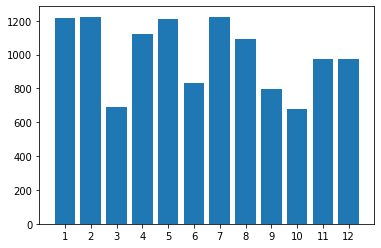

In [31]:
plt.bar([i for i in range(1,13)], oco_month)
plt.xticks([i for i in range(1,13)])

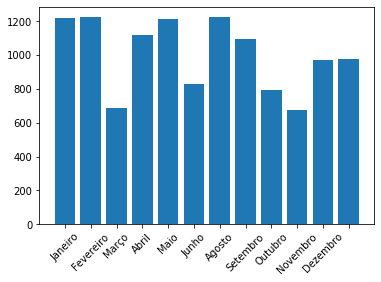

In [32]:
plt.bar([i for i in range(1,13)], oco_month)
plt.xticks([i for i in range(1,13)],['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],rotation=45)
plt.show()

In [33]:
df_num_tmp = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 

In [34]:
df_num_tmp

['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [35]:
df_num = df.select_dtypes(include = df_num_tmp)

In [36]:
df_num

,codigo_ocorrencia,aeronave_pmd,aeronave_assentos,aeronave_ano_fabricacao,total_fatalidades,ocorrencia_latitude,ocorrencia_longitude,total_recomendacoes,total_aeronaves_envolvidas,delta
0,201511054981552,660,2.0,1960.0,0,-22.9792,-46.5208,1,1,1303
1,201511054981552,660,2.0,1960.0,0,-22.9792,-46.5208,1,1,1303
2,201511054981552,660,2.0,1960.0,0,-22.9792,-46.5208,1,1,1303
3,201511054981552,660,2.0,1960.0,0,-22.9792,-46.5208,1,1,1303
4,201012151657272,2310,6.0,1966.0,0,-5.2111,-40.7042,4,1,3089
...,...,...,...,...,...,...,...,...,...,...
12026,201609211816121,700,2.0,2015.0,0,-19.8906,-44.0600,2,1,987
12027,201609211816121,700,2.0,2015.0,0,-19.8906,-44.0600,2,1,987
12028,201802281826239,3175,1.0,2017.0,0,-23.5831,-48.1750,1,1,473
12029,201802281826239,3175,1.0,2017.0,0,-23.5831,-48.1750,1,1,473


In [37]:
%load_ext rpy2.ipython

In [38]:
%%R
install.packages('kohonen')

In [39]:
%%R
require(kohonen)

In [40]:
df.columns

Index(['codigo_ocorrencia', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeronave_fase_operacao_icao', 'aeronave_tipo_operacao',
       'aeronave_nivel_dano', 'total_fatalidades', 'aeronave_dia_extracao',
       'fator_nome', 'fator_aspecto', 'fator_condicionante', 'fator_area',
       'fator_detalhe_fator', 'fator_dia_extracao', 'ocorrencia_classificacao',
       'ocorrencia_tipo', 'ocorrencia_tipo_categoria', 'ocorrencia_tipo_icao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cida

In [41]:
df_tidy = pd.DataFrame()

In [42]:
df_tidy

""


In [43]:
df_tidy['aer_tipo'] = df['aeronave_tipo_veiculo']
df_tidy['aer_fabric'] = df['aeronave_fabricante']
df_tidy['motor_tipo'] = df['aeronave_motor_tipo']
df_tidy['n_motor'] = df['aeronave_motor_quantidade']
df_tidy['pmd'] = df['aeronave_pmd']
df_tidy['pmd_cat'] = df['aeronave_pmd_categoria']
df_tidy['ano_fabric'] = df['aeronave_ano_fabricacao']
df_tidy['fase_op'] = df['aeronave_fase_operacao']
df_tidy['tipo_op'] = df['aeronave_tipo_operacao']
df_tidy['dano'] = df['aeronave_nivel_dano']
df_tidy['n_fatal'] = df['total_fatalidades']
df_tidy['data_inv'] = df['aeronave_dia_extracao']
df_tidy['fator'] = df['fator_nome']
df_tidy['fator_cond'] = df['fator_condicionante']
df_tidy['class'] = df['ocorrencia_classificacao']
df_tidy['tipo_oco'] = df['ocorrencia_tipo']
df_tidy['latitude'] = df['ocorrencia_latitude']
df_tidy['longitude'] = df['ocorrencia_longitude']
df_tidy['dia'] = df['ocorrencia_dia']
df_tidy['hora'] = df['ocorrencia_horario']
df_tidy['dia_inv'] = df['ocorrencia_dia_extracao']
df_tidy['delta'] = df['delta']

In [44]:
df_tidy

,aer_tipo,aer_fabric,motor_tipo,n_motor,pmd,pmd_cat,ano_fabric,fase_op,tipo_op,dano,...,fator,fator_cond,class,tipo_oco,latitude,longitude,dia,hora,dia_inv,delta
0,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,1960.0,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,...,PROCESSOS ORGANIZACIONAIS,ORGANIZACIONAL,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,-22.9792,-46.5208,2015-11-05,19:15:00,2019-05-31,1303
1,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,1960.0,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,...,APLICAÇÃO DE COMANDOS,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,-22.9792,-46.5208,2015-11-05,19:15:00,2019-05-31,1303
2,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,1960.0,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,...,COORDENAÇÃO DE CABINE,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,-22.9792,-46.5208,2015-11-05,19:15:00,2019-05-31,1303
3,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,1960.0,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,...,INSTRUÇÃO,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,-22.9792,-46.5208,2015-11-05,19:15:00,2019-05-31,1303
4,AVIÃO,BEECH AIRCRAFT,PISTÃO,BIMOTOR,2310,ENTRE 2250 E 5700 KG,1966.0,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,...,MANUTENÇÃO DE AERONAVE,MANUTENÇÃO DA AERONAVE,ACIDENTE,COM TREM DE POUSO,-5.2111,-40.7042,2010-12-15,09:00:00,2019-05-31,3089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026,HELICÓPTERO,GUIMBAL,PISTÃO,MONOMOTOR,700,ATÉ 2250 KG,2015.0,SUBIDA,VOO DE INSTRUÇÃO,SUBSTANCIAL,...,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE EM VOO,-19.8906,-44.0600,2016-09-16,20:20:00,2019-05-31,987
12027,HELICÓPTERO,GUIMBAL,PISTÃO,MONOMOTOR,700,ATÉ 2250 KG,2015.0,SUBIDA,VOO DE INSTRUÇÃO,SUBSTANCIAL,...,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE EM VOO,-19.8906,-44.0600,2016-09-16,20:20:00,2019-05-31,987
12028,AVIÃO,AIR TRACTOR,TURBOÉLICE,MONOMOTOR,3175,ENTRE 2250 E 5700 KG,2017.0,CORRIDA APÓS POUSO,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,...,APLICAÇÃO DE COMANDOS,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE NO SOLO,-23.5831,-48.1750,2018-02-12,21:30:00,2019-05-31,473
12029,AVIÃO,AIR TRACTOR,TURBOÉLICE,MONOMOTOR,3175,ENTRE 2250 E 5700 KG,2017.0,CORRIDA APÓS POUSO,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,...,JULGAMENTO DE PILOTAGEM,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE NO SOLO,-23.5831,-48.1750,2018-02-12,21:30:00,2019-05-31,473


In [45]:
df_tidy.isna().any()

aer_tipo      False
aer_fabric    False
motor_tipo    False
n_motor       False
pmd           False
pmd_cat       False
ano_fabric     True
fase_op       False
tipo_op       False
dano          False
n_fatal       False
data_inv      False
fator         False
fator_cond    False
class         False
tipo_oco      False
latitude      False
longitude     False
dia           False
hora          False
dia_inv       False
delta         False
dtype: bool

In [46]:
df_tidy['ano_fabric'].isna().sum()

20

In [47]:
df_tidy[df_tidy['ano_fabric'].isna()]

,aer_tipo,aer_fabric,motor_tipo,n_motor,pmd,pmd_cat,ano_fabric,fase_op,tipo_op,dano,...,fator,fator_cond,class,tipo_oco,latitude,longitude,dia,hora,dia_inv,delta
11953,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,1157,ATÉ 2250 KG,NaN,TÁXI,VOO DE INSTRUÇÃO,LEVE,...,ILUSÕES VISUAIS,***,INCIDENTE GRAVE,COLISÃO DE VEÍCULO COM AERONAVE,-16.3606,-48.9275,2015-04-09,13:13:00,2019-05-31,1513
11954,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,1157,ATÉ 2250 KG,NaN,TÁXI,VOO DE INSTRUÇÃO,LEVE,...,ILUSÕES VISUAIS,***,INCIDENTE GRAVE,COLISÃO DE VEÍCULO COM AERONAVE,-16.3606,-48.9275,2015-04-09,13:13:00,2019-05-31,1513
11955,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,1157,ATÉ 2250 KG,NaN,TÁXI,VOO DE INSTRUÇÃO,LEVE,...,ILUSÕES VISUAIS,***,INCIDENTE GRAVE,COLISÃO DE VEÍCULO COM AERONAVE,-16.3606,-48.9275,2015-04-09,13:13:00,2019-05-31,1513
11956,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,1157,ATÉ 2250 KG,NaN,TÁXI,VOO DE INSTRUÇÃO,LEVE,...,INFRAESTRUTURA AEROPORTUÁRIA,***,INCIDENTE GRAVE,COLISÃO DE VEÍCULO COM AERONAVE,-16.3606,-48.9275,2015-04-09,13:13:00,2019-05-31,1513
11957,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,1157,ATÉ 2250 KG,NaN,TÁXI,VOO DE INSTRUÇÃO,LEVE,...,INFRAESTRUTURA AEROPORTUÁRIA,***,INCIDENTE GRAVE,COLISÃO DE VEÍCULO COM AERONAVE,-16.3606,-48.9275,2015-04-09,13:13:00,2019-05-31,1513
11958,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,1157,ATÉ 2250 KG,NaN,TÁXI,VOO DE INSTRUÇÃO,LEVE,...,INFRAESTRUTURA AEROPORTUÁRIA,***,INCIDENTE GRAVE,COLISÃO DE VEÍCULO COM AERONAVE,-16.3606,-48.9275,2015-04-09,13:13:00,2019-05-31,1513
11959,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,1157,ATÉ 2250 KG,NaN,TÁXI,VOO DE INSTRUÇÃO,LEVE,...,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,COLISÃO DE VEÍCULO COM AERONAVE,-16.3606,-48.9275,2015-04-09,13:13:00,2019-05-31,1513
11960,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,1157,ATÉ 2250 KG,NaN,TÁXI,VOO DE INSTRUÇÃO,LEVE,...,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,COLISÃO DE VEÍCULO COM AERONAVE,-16.3606,-48.9275,2015-04-09,13:13:00,2019-05-31,1513
11961,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,1157,ATÉ 2250 KG,NaN,TÁXI,VOO DE INSTRUÇÃO,LEVE,...,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,COLISÃO DE VEÍCULO COM AERONAVE,-16.3606,-48.9275,2015-04-09,13:13:00,2019-05-31,1513
11987,AVIÃO,EMBRAER,PISTÃO,MONOMOTOR,1800,ATÉ 2250 KG,NaN,ESPECIALIZADA,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,...,ATENÇÃO,INDIVIDUAL,ACIDENTE,PANE SECA,-29.8369,-55.9458,2017-03-13,13:20:00,2019-05-31,809


In [48]:
df_tidy = df_tidy.dropna()

In [49]:
df_tidy.drop(df_tidy[df_tidy["ano_fabric"]==0.0].index, inplace = True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
df_tidy.isna().any()

aer_tipo      False
aer_fabric    False
motor_tipo    False
n_motor       False
pmd           False
pmd_cat       False
ano_fabric    False
fase_op       False
tipo_op       False
dano          False
n_fatal       False
data_inv      False
fator         False
fator_cond    False
class         False
tipo_oco      False
latitude      False
longitude     False
dia           False
hora          False
dia_inv       False
delta         False
dtype: bool

In [51]:
df_tidy.dtypes

aer_tipo              object
aer_fabric            object
motor_tipo            object
n_motor               object
pmd                    int64
pmd_cat               object
ano_fabric           float64
fase_op               object
tipo_op               object
dano                  object
n_fatal                int64
data_inv              object
fator                 object
fator_cond            object
class                 object
tipo_oco              object
latitude             float64
longitude            float64
dia           datetime64[ns]
hora                  object
dia_inv       datetime64[ns]
delta                  int64
dtype: object

In [52]:
df_tidy["data_inv"] = pd.to_datetime(df_tidy["data_inv"])
df_tidy["hora"] = pd.to_datetime(df_tidy["hora"]).dt.hour

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df_tidy["hora"]

0        19
1        19
2        19
3        19
4         9
         ..
12026    20
12027    20
12028    21
12029    21
12030    21
Name: hora, Length: 11856, dtype: int64

In [54]:
df_tidy.select_dtypes(include = 'object')

,aer_tipo,aer_fabric,motor_tipo,n_motor,pmd_cat,fase_op,tipo_op,dano,fator,fator_cond,class,tipo_oco
0,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,ATÉ 2250 KG,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,PROCESSOS ORGANIZACIONAIS,ORGANIZACIONAL,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO
1,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,ATÉ 2250 KG,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,APLICAÇÃO DE COMANDOS,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO
2,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,ATÉ 2250 KG,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,COORDENAÇÃO DE CABINE,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO
3,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,ATÉ 2250 KG,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,INSTRUÇÃO,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO
4,AVIÃO,BEECH AIRCRAFT,PISTÃO,BIMOTOR,ENTRE 2250 E 5700 KG,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,MANUTENÇÃO DE AERONAVE,MANUTENÇÃO DA AERONAVE,ACIDENTE,COM TREM DE POUSO
...,...,...,...,...,...,...,...,...,...,...,...,...
12026,HELICÓPTERO,GUIMBAL,PISTÃO,MONOMOTOR,ATÉ 2250 KG,SUBIDA,VOO DE INSTRUÇÃO,SUBSTANCIAL,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE EM VOO
12027,HELICÓPTERO,GUIMBAL,PISTÃO,MONOMOTOR,ATÉ 2250 KG,SUBIDA,VOO DE INSTRUÇÃO,SUBSTANCIAL,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE EM VOO
12028,AVIÃO,AIR TRACTOR,TURBOÉLICE,MONOMOTOR,ENTRE 2250 E 5700 KG,CORRIDA APÓS POUSO,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,APLICAÇÃO DE COMANDOS,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE NO SOLO
12029,AVIÃO,AIR TRACTOR,TURBOÉLICE,MONOMOTOR,ENTRE 2250 E 5700 KG,CORRIDA APÓS POUSO,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,JULGAMENTO DE PILOTAGEM,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE NO SOLO


In [55]:
df_tidy.select_dtypes(include = 'object') 

,aer_tipo,aer_fabric,motor_tipo,n_motor,pmd_cat,fase_op,tipo_op,dano,fator,fator_cond,class,tipo_oco
0,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,ATÉ 2250 KG,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,PROCESSOS ORGANIZACIONAIS,ORGANIZACIONAL,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO
1,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,ATÉ 2250 KG,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,APLICAÇÃO DE COMANDOS,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO
2,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,ATÉ 2250 KG,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,COORDENAÇÃO DE CABINE,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO
3,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,ATÉ 2250 KG,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,INSTRUÇÃO,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO
4,AVIÃO,BEECH AIRCRAFT,PISTÃO,BIMOTOR,ENTRE 2250 E 5700 KG,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,MANUTENÇÃO DE AERONAVE,MANUTENÇÃO DA AERONAVE,ACIDENTE,COM TREM DE POUSO
...,...,...,...,...,...,...,...,...,...,...,...,...
12026,HELICÓPTERO,GUIMBAL,PISTÃO,MONOMOTOR,ATÉ 2250 KG,SUBIDA,VOO DE INSTRUÇÃO,SUBSTANCIAL,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE EM VOO
12027,HELICÓPTERO,GUIMBAL,PISTÃO,MONOMOTOR,ATÉ 2250 KG,SUBIDA,VOO DE INSTRUÇÃO,SUBSTANCIAL,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE EM VOO
12028,AVIÃO,AIR TRACTOR,TURBOÉLICE,MONOMOTOR,ENTRE 2250 E 5700 KG,CORRIDA APÓS POUSO,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,APLICAÇÃO DE COMANDOS,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE NO SOLO
12029,AVIÃO,AIR TRACTOR,TURBOÉLICE,MONOMOTOR,ENTRE 2250 E 5700 KG,CORRIDA APÓS POUSO,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,JULGAMENTO DE PILOTAGEM,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE NO SOLO


In [56]:
df_tidy[df_tidy.select_dtypes(include = 'object').columns] = df_tidy.select_dtypes(include = 'object').astype('category')

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [57]:
df_tidy.dtypes

aer_tipo            category
aer_fabric          category
motor_tipo          category
n_motor             category
pmd                    int64
pmd_cat             category
ano_fabric           float64
fase_op             category
tipo_op             category
dano                category
n_fatal                int64
data_inv      datetime64[ns]
fator               category
fator_cond          category
class               category
tipo_oco            category
latitude             float64
longitude            float64
dia           datetime64[ns]
hora                   int64
dia_inv       datetime64[ns]
delta                  int64
dtype: object

In [58]:
df_tidy

,aer_tipo,aer_fabric,motor_tipo,n_motor,pmd,pmd_cat,ano_fabric,fase_op,tipo_op,dano,...,fator,fator_cond,class,tipo_oco,latitude,longitude,dia,hora,dia_inv,delta
0,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,1960.0,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,...,PROCESSOS ORGANIZACIONAIS,ORGANIZACIONAL,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,-22.9792,-46.5208,2015-11-05,19,2019-05-31,1303
1,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,1960.0,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,...,APLICAÇÃO DE COMANDOS,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,-22.9792,-46.5208,2015-11-05,19,2019-05-31,1303
2,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,1960.0,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,...,COORDENAÇÃO DE CABINE,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,-22.9792,-46.5208,2015-11-05,19,2019-05-31,1303
3,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,660,ATÉ 2250 KG,1960.0,DECOLAGEM,VOO DE INSTRUÇÃO,LEVE,...,INSTRUÇÃO,OPERAÇÃO DA AERONAVE,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,-22.9792,-46.5208,2015-11-05,19,2019-05-31,1303
4,AVIÃO,BEECH AIRCRAFT,PISTÃO,BIMOTOR,2310,ENTRE 2250 E 5700 KG,1966.0,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,...,MANUTENÇÃO DE AERONAVE,MANUTENÇÃO DA AERONAVE,ACIDENTE,COM TREM DE POUSO,-5.2111,-40.7042,2010-12-15,9,2019-05-31,3089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026,HELICÓPTERO,GUIMBAL,PISTÃO,MONOMOTOR,700,ATÉ 2250 KG,2015.0,SUBIDA,VOO DE INSTRUÇÃO,SUBSTANCIAL,...,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE EM VOO,-19.8906,-44.0600,2016-09-16,20,2019-05-31,987
12027,HELICÓPTERO,GUIMBAL,PISTÃO,MONOMOTOR,700,ATÉ 2250 KG,2015.0,SUBIDA,VOO DE INSTRUÇÃO,SUBSTANCIAL,...,POUCA EXPERIÊNCIA DO PILOTO,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE EM VOO,-19.8906,-44.0600,2016-09-16,20,2019-05-31,987
12028,AVIÃO,AIR TRACTOR,TURBOÉLICE,MONOMOTOR,3175,ENTRE 2250 E 5700 KG,2017.0,CORRIDA APÓS POUSO,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,...,APLICAÇÃO DE COMANDOS,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE NO SOLO,-23.5831,-48.1750,2018-02-12,21,2019-05-31,473
12029,AVIÃO,AIR TRACTOR,TURBOÉLICE,MONOMOTOR,3175,ENTRE 2250 E 5700 KG,2017.0,CORRIDA APÓS POUSO,OPERAÇÃO AGRÍCOLA,SUBSTANCIAL,...,JULGAMENTO DE PILOTAGEM,OPERAÇÃO DA AERONAVE,ACIDENTE,PERDA DE CONTROLE NO SOLO,-23.5831,-48.1750,2018-02-12,21,2019-05-31,473


In [59]:
df_tidy['pmd_cat']

0                 ATÉ 2250 KG
1                 ATÉ 2250 KG
2                 ATÉ 2250 KG
3                 ATÉ 2250 KG
4        ENTRE 2250 E 5700 KG
                 ...         
12026             ATÉ 2250 KG
12027             ATÉ 2250 KG
12028    ENTRE 2250 E 5700 KG
12029    ENTRE 2250 E 5700 KG
12030    ENTRE 2250 E 5700 KG
Name: pmd_cat, Length: 11856, dtype: category
Categories (3, object): [ACIMA DE 5700 KG, ATÉ 2250 KG, ENTRE 2250 E 5700 KG]

In [60]:
df_tidy['pmd_cat'].cat.codes

0        1
1        1
2        1
3        1
4        2
        ..
12026    1
12027    1
12028    2
12029    2
12030    2
Length: 11856, dtype: int8

In [61]:
df_tidy_num = pd.DataFrame()

In [62]:
for column in df_tidy.select_dtypes(include = 'category').columns:
    df_tidy_num[column] = df_tidy[column].cat.codes

In [63]:
df_tidy_num

,aer_tipo,aer_fabric,motor_tipo,n_motor,pmd_cat,fase_op,tipo_op,dano,fator,fator_cond,class,tipo_oco
0,1,36,2,2,1,6,5,2,56,4,2,37
1,1,36,2,2,1,6,5,2,1,3,2,37
2,1,36,2,2,1,6,5,2,13,3,2,37
3,1,36,2,2,1,6,5,2,37,3,2,37
4,1,9,2,1,2,4,4,4,42,2,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
12026,2,24,2,2,1,21,5,4,54,3,0,36
12027,2,24,2,2,1,21,5,4,54,3,0,36
12028,1,5,5,2,2,4,1,4,1,3,0,37
12029,1,5,5,2,2,4,1,4,39,3,0,37


In [64]:
max(df_tidy_num['fator'])

66

In [65]:
for column in df_tidy.select_dtypes(include = ['int64', 'float64']).columns:
    df_tidy_num[column] = df_tidy[column]

In [66]:
df_tidy_num

,aer_tipo,aer_fabric,motor_tipo,n_motor,pmd_cat,fase_op,tipo_op,dano,fator,fator_cond,class,tipo_oco,pmd,ano_fabric,n_fatal,latitude,longitude,hora,delta
0,1,36,2,2,1,6,5,2,56,4,2,37,660,1960.0,0,-22.9792,-46.5208,19,1303
1,1,36,2,2,1,6,5,2,1,3,2,37,660,1960.0,0,-22.9792,-46.5208,19,1303
2,1,36,2,2,1,6,5,2,13,3,2,37,660,1960.0,0,-22.9792,-46.5208,19,1303
3,1,36,2,2,1,6,5,2,37,3,2,37,660,1960.0,0,-22.9792,-46.5208,19,1303
4,1,9,2,1,2,4,4,4,42,2,0,16,2310,1966.0,0,-5.2111,-40.7042,9,3089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026,2,24,2,2,1,21,5,4,54,3,0,36,700,2015.0,0,-19.8906,-44.0600,20,987
12027,2,24,2,2,1,21,5,4,54,3,0,36,700,2015.0,0,-19.8906,-44.0600,20,987
12028,1,5,5,2,2,4,1,4,1,3,0,37,3175,2017.0,0,-23.5831,-48.1750,21,473
12029,1,5,5,2,2,4,1,4,39,3,0,37,3175,2017.0,0,-23.5831,-48.1750,21,473


In [67]:
df_tidy_num.dtypes

aer_tipo         int8
aer_fabric       int8
motor_tipo       int8
n_motor          int8
pmd_cat          int8
fase_op          int8
tipo_op          int8
dano             int8
fator            int8
fator_cond       int8
class            int8
tipo_oco         int8
pmd             int64
ano_fabric    float64
n_fatal         int64
latitude      float64
longitude     float64
hora            int64
delta           int64
dtype: object

In [68]:
for column in df_tidy_num.columns:
    df_tidy_num[column] = (df_tidy_num[column] - df_tidy_num[column].min())/(df_tidy_num[column].max() - df_tidy_num[column].min())

In [69]:
df_tidy_num

,aer_tipo,aer_fabric,motor_tipo,n_motor,pmd_cat,fase_op,tipo_op,dano,fator,fator_cond,class,tipo_oco,pmd,ano_fabric,n_fatal,latitude,longitude,hora,delta
0,0.2,0.734694,0.4,0.50,0.5,0.272727,0.555556,0.5,0.848485,0.666667,1.0,0.804348,0.001097,0.240000,0.0,0.351808,0.205855,0.826087,0.317772
1,0.2,0.734694,0.4,0.50,0.5,0.272727,0.555556,0.5,0.015152,0.500000,1.0,0.804348,0.001097,0.240000,0.0,0.351808,0.205855,0.826087,0.317772
2,0.2,0.734694,0.4,0.50,0.5,0.272727,0.555556,0.5,0.196970,0.500000,1.0,0.804348,0.001097,0.240000,0.0,0.351808,0.205855,0.826087,0.317772
3,0.2,0.734694,0.4,0.50,0.5,0.272727,0.555556,0.5,0.560606,0.500000,1.0,0.804348,0.001097,0.240000,0.0,0.351808,0.205855,0.826087,0.317772
4,0.2,0.183673,0.4,0.25,1.0,0.181818,0.444444,1.0,0.636364,0.333333,0.0,0.347826,0.005863,0.320000,0.0,0.564404,0.251452,0.391304,0.805351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026,0.4,0.489796,0.4,0.50,0.5,0.954545,0.555556,1.0,0.818182,0.500000,0.0,0.782609,0.001213,0.973333,0.0,0.388763,0.225145,0.869565,0.231504
12027,0.4,0.489796,0.4,0.50,0.5,0.954545,0.555556,1.0,0.818182,0.500000,0.0,0.782609,0.001213,0.973333,0.0,0.388763,0.225145,0.869565,0.231504
12028,0.2,0.102041,1.0,0.50,1.0,0.181818,0.111111,1.0,0.015152,0.500000,0.0,0.804348,0.008361,1.000000,0.0,0.344582,0.192888,0.913043,0.091182
12029,0.2,0.102041,1.0,0.50,1.0,0.181818,0.111111,1.0,0.590909,0.500000,0.0,0.804348,0.008361,1.000000,0.0,0.344582,0.192888,0.913043,0.091182


In [70]:
df_tidy_num.to_csv('DataFrame.txt', sep = ',', index = False)

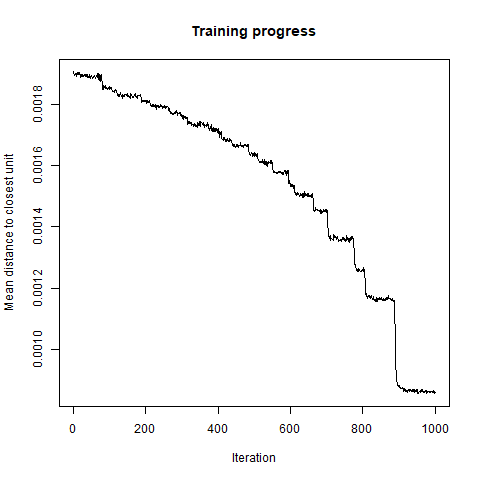

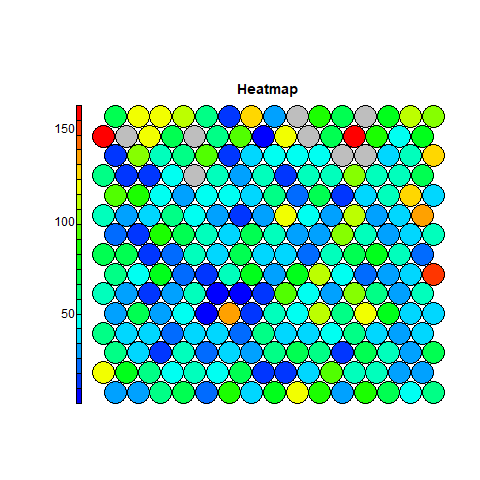

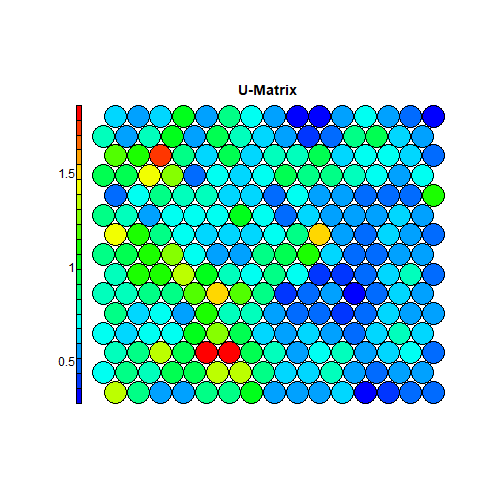

In [71]:
%%R
require(kohonen)
data <- read.table("DataFrame.txt", header = TRUE, sep = ',')
data_matrix <- as.matrix(data)
coolBlueHotRed <- function(n, alpha = 1){rainbow(n, end = 4/6, alpha = alpha)[n:1]}
som_grid <- somgrid(xdim = 15, ydim = 15, topo = "hexagonal")
som_model <- som(data_matrix, grid = som_grid, rlen = 1000, alpha = c(0.05, 0.01), keep.data = TRUE)
plot(som_model, type = "changes")
plot(som_model, type = "count", main = "Heatmap", palette.name = coolBlueHotRed)
plot(som_model, type = "dist.neighbours", main = "U-Matrix", palette.name = coolBlueHotRed)

<Figure size 1080x1080 with 0 Axes>

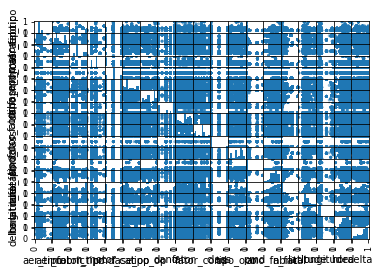

In [72]:
from pandas.plotting import scatter_matrix
plt.figure(figsize = (15, 15))
scatter_matrix(df_tidy_num)
plt.show()

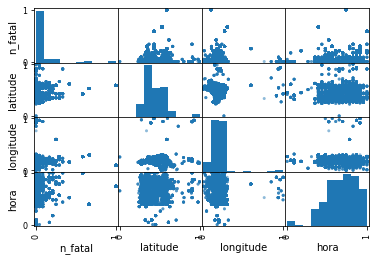

In [73]:
scatter_matrix(df_tidy_num.iloc[:,14:18])
plt.show()

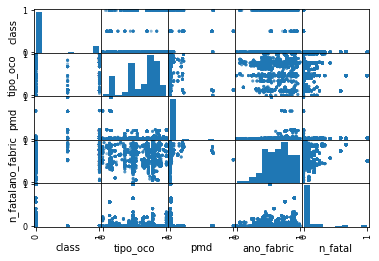

In [74]:
scatter_matrix(df_tidy_num.iloc[:,10:15])
plt.show()

In [75]:
df_tidy_num.values.shape

(11856, 19)

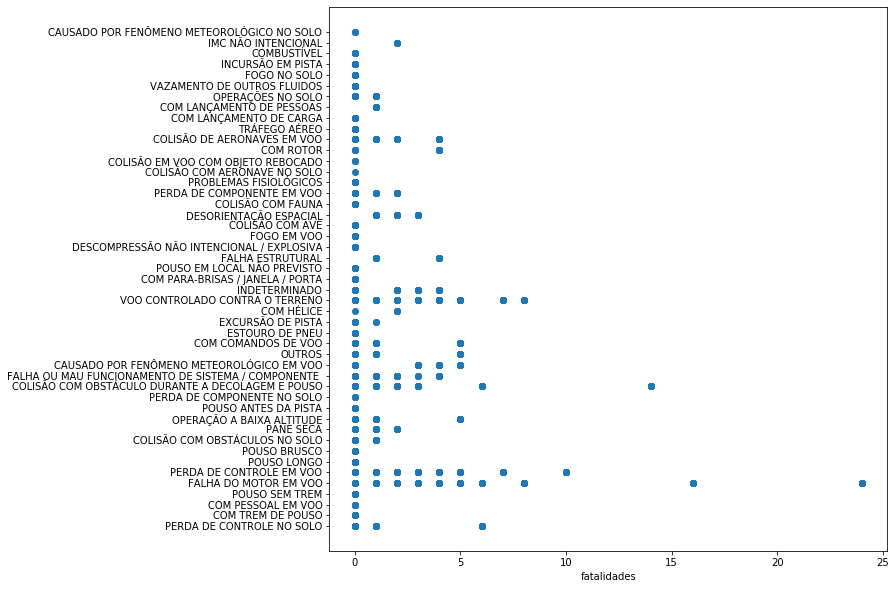

In [76]:
plt.figure(figsize = (10, 10))
plt.scatter(df_tidy['n_fatal'], df_tidy['tipo_oco'])
plt.xlabel("fatalidades")
plt.show()

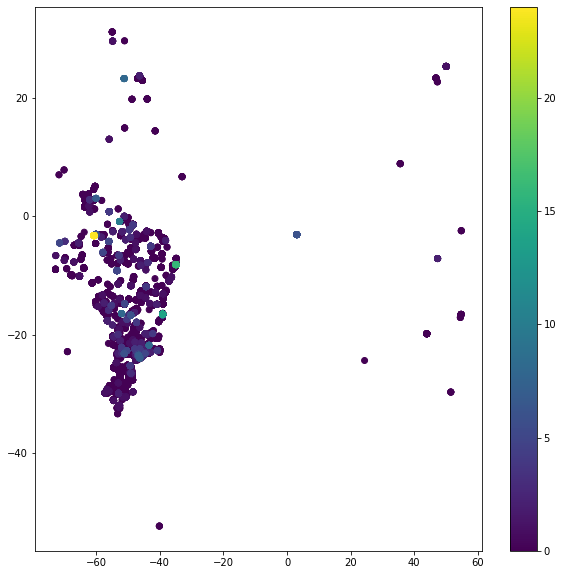

In [77]:
tmp = df_tidy.sort_values(by = ['n_fatal'])
plt.figure(figsize = (10, 10))
plt.scatter( tmp['longitude'],tmp['latitude'],c=tmp['n_fatal'])
#plt.xlabel("fatalidades")
plt.colorbar()
plt.show()

In [78]:
df_tidy.sort_values(by = ['n_fatal'])['n_fatal']

0        0
6659     0
6658     0
6657     0
6656     0
        ..
184     24
185     24
186     24
177     24
370     24
Name: n_fatal, Length: 11856, dtype: int64

Text(0.5, 0, 'ano_fabric')

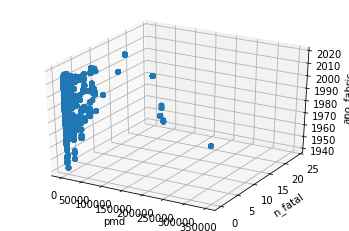

In [79]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_tidy['pmd'], df_tidy['n_fatal'], df_tidy['ano_fabric'])
ax.set_xlabel('pmd')
ax.set_ylabel('n_fatal')
ax.set_zlabel('ano_fabric')

In [80]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 4).fit(df_tidy_num)

In [81]:
clustering.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

Text(0.5, 0, 'ano_fabric')

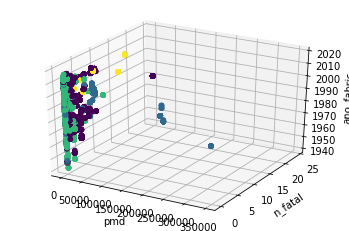

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_tidy['pmd'], df_tidy['n_fatal'], df_tidy['ano_fabric'], c = clustering.labels_)
ax.set_xlabel('pmd')
ax.set_ylabel('n_fatal')
ax.set_zlabel('ano_fabric')

In [83]:
clustering = AgglomerativeClustering(n_clusters = 3).fit(df_tidy_num[['n_fatal', 'ano_fabric', 'pmd']])

<IPython.core.display.Javascript object>


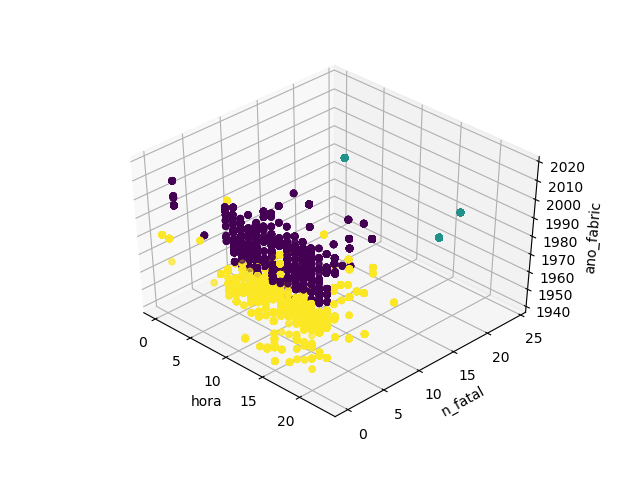

Text(0.5, 0, 'ano_fabric')

In [92]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_tidy['hora'], df_tidy['n_fatal'], df_tidy['ano_fabric'], c = clustering.labels_)
ax.set_xlabel('hora')
ax.set_ylabel('n_fatal')
ax.set_zlabel('ano_fabric')